In [1]:
!pip install requests pandas matplotlib


In [10]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
#Alaración: Los resultados de cada consigna figuran abajo, ahí también figuran el histograma y el dataframe
# Ejercicio 1: Obtener ítems de una consulta de búsqueda en Mercado Libre
# La palabra que buscamos en este caso es computadora
def buscar_productos(query):
    url = f'https://api.mercadolibre.com/sites/MLA/search?q={query}'
    response = requests.get(url)
    data = response.json()
    print (data)
    return data['results']

In [12]:
# Ejercicio 2: Guardar precios en un DataFrame y calcular estadísticas
def analizar_precios(productos):
    precios = [producto['price'] for producto in productos]
    df = pd.DataFrame(precios, columns=['Precio'])
    estadisticas = df.describe()
    return estadisticas
#Con este código obtenemos un Dataframe que arrojó los datos requeridos de los precios
#Precio Promedio = 239049.68760, Precio mínimo =  3484.00000, Precio Máximo = 779999.40000


In [13]:
# Ejercicio 3: Graficar histograma de precios
def graficar_histograma(productos):
    precios = [producto['price'] for producto in productos]
    plt.hist(precios, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Precio')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de Precios')
    plt.grid(True)
    plt.show()
#Podríamos considerar como un outlier el primer intervalo de valores porque su frecuencia es doblemente mayor que la frecuencia de las  demás observaciones 

In [14]:
# Ejercicio 4: Realizar consulta adicional y análisis de resultados
def consulta_adicional(vendedor_id):
    url = f'https://api.mercadolibre.com/sites/MLA/search?seller_id={vendedor_id}'
    response = requests.get(url)
    data = response.json()
# Analizar resultados
# Por ejemplo, calculamos el precio promedio de los productos del vendedor, para esto fijamos su id 
    precios = [producto['price'] for producto in data['results']]
    precio_promedio = sum(precios) / len(precios)
    return precio_promedio


{'site_id': 'MLA', 'country_default_time_zone': 'GMT-03:00', 'query': 'computadora', 'paging': {'total': 184470, 'primary_results': 1000, 'offset': 0, 'limit': 50}, 'results': [{'id': 'MLA1395807333', 'title': 'Computadora Notebook Para Trabajo Estudio Core I5 Economica', 'condition': 'new', 'thumbnail_id': '734722-MLA75123955647_032024', 'catalog_product_id': None, 'listing_type_id': 'gold_special', 'permalink': 'https://articulo.mercadolibre.com.ar/MLA-1395807333-computadora-notebook-para-trabajo-estudio-core-i5-economica-_JM', 'buying_mode': 'buy_it_now', 'site_id': 'MLA', 'category_id': 'MLA1652', 'domain_id': 'MLA-NOTEBOOKS', 'thumbnail': 'http://http2.mlstatic.com/D_734722-MLA75123955647_032024-I.jpg', 'currency_id': 'ARS', 'order_backend': 1, 'price': 295000, 'original_price': None, 'sale_price': None, 'available_quantity': 1, 'official_store_id': None, 'use_thumbnail_id': True, 'accepts_mercadopago': True, 'variation_filters': ['COLOR'], 'shipping': {'store_pick_up': False, 'fr

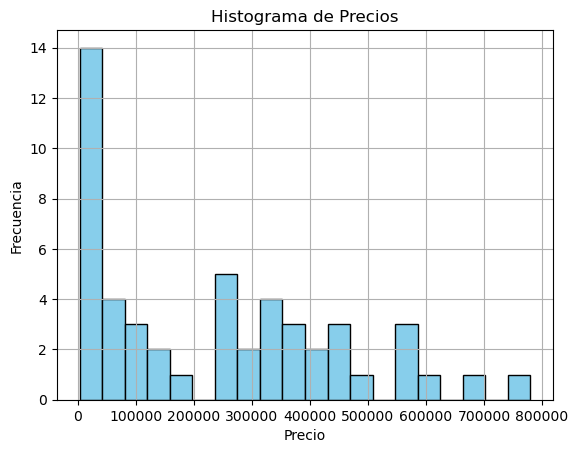


Ejercicio 4:
Precio promedio de los productos del vendedor: $324387.66


In [15]:
# Ahora con el comando print vemos que arrojó cada ejercicio 
productos = buscar_productos('computadora')
print("Ejercicio 1:")
print(productos[:5])  # Muestra únicamente los primeros 5 productos encontrados (para evitar una lista tan larga)

print("\nEjercicio 2:")
print(analizar_precios(productos))

print("\nEjercicio 3:")
graficar_histograma(productos)

print("\nEjercicio 4:")
vendedor_id = '299521080'  # Este es el ID del vendedor que quisimos consultar
precio_promedio_vendedor = consulta_adicional(vendedor_id)
print(f"Precio promedio de los productos del vendedor: ${precio_promedio_vendedor:.2f}")